In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [89]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/diabetes.csv')
print(df.columns)
print(df.eq(0).sum())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


## 여러 feature에 일부 행이 0 값을 가지고 있는 것을 발견하여, 해당 데이터를 처리하기 위한 전처리 단계를 추가하였습니다


In [66]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age',]
for col in cols:
    mean_value = df[col][df[col] != 0].mean()
    df[col] = df[col].replace(0, mean_value)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168,43.1,2.288,33,1


In [68]:

X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [70]:
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [72]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [74]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 8), (614,), (154, 8), (154,))

In [76]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

D:\Tool File\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303 (5.09 KB)

 Trainable params: 1,303 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2836 - mse: 0.2836 - val_loss: 0.2300 - val_mse: 0.2300
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2230 - mse: 0.2230 - val_loss: 0.2075 - val_mse: 0.2075
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2011 - mse: 0.2011 - val_loss: 0.1945 - val_mse: 0.1945
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1962 - mse: 0.1962 - val_loss: 0.1854 - val_mse: 0.1854
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1849 - mse: 0.1849 - val_loss: 0.1715 - val_mse: 0.1715
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1762 - mse: 0.1762 - val_loss: 0.1752 - val_mse: 0.1752
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1686 - mse: 0.1686 - val_loss: 0.1643 - val_mse: 0.1643
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1668 - mse: 0.1668 - val_loss: 0.1596 - val_mse: 0.1596
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1711 - mse:

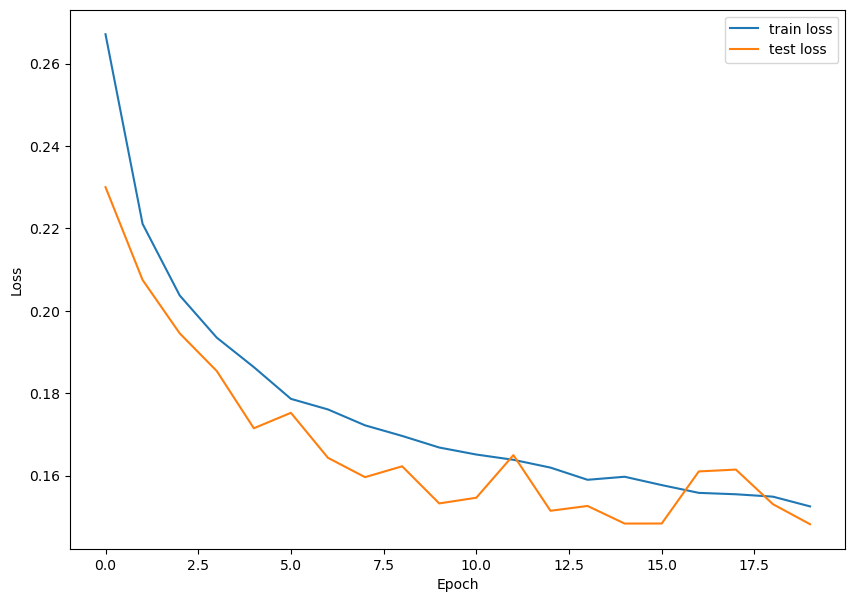

In [79]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:

model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1373 - mse: 0.1373 


[0.14820316433906555, 0.14820316433906555]